# Capítulo 01 - Introdução
***
- `Repositório original`: [data-science-from-scratch](https://github.com/joelgrus/data-science-from-scratch) 

## Encontrando conectores-chaves

In [1]:
class lista_usuarios():
    '''lista de usuários com nome e id'''
    
    def __init__(self, users = []):
        self.users = users
        
    def append_user(self, token):
        self.users.append(token)
        
    def add_user(self, id_, name):
        token = {'id': id_, 'name': name}
        self.append_user(token)
        
    def get_users(self):
        return self.users

In [2]:
# instanciando o objeto users 
users = lista_usuarios()

# adicionando ids e nomes de usuários 
users.add_user(0, 'Hero')
users.add_user(1, 'Dunn')
users.add_user(2, 'Sue')
users.add_user(3, 'Chi')
users.add_user(4, 'Thor')
users.add_user(5, 'Clive')
users.add_user(6, 'Hicks')
users.add_user(7, 'Devin')
users.add_user(8, 'Kate')
users.add_user(9, 'Klein')

# iterando sobre a lista de usuários  
users = users.get_users()
for user in users:
    print(user)

{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}
{'id': 2, 'name': 'Sue'}
{'id': 3, 'name': 'Chi'}
{'id': 4, 'name': 'Thor'}
{'id': 5, 'name': 'Clive'}
{'id': 6, 'name': 'Hicks'}
{'id': 7, 'name': 'Devin'}
{'id': 8, 'name': 'Kate'}
{'id': 9, 'name': 'Klein'}


In [4]:
# dados amigáveis por dupla de ids
friendship = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
              (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

In [ ]:
# iterando sobre a lista de usuários
for user in users:
    # definindo um dict vazio para criar uma lista de amigos
    user['friends'] = []

# iterando sobre a lista relação de duplas de amigos
for i, j in friendship: 
    '''definindo os amigos de cada usuário'''
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [14]:
def number_of_friends(user):
    '''analisando quantos amigos o usuário possui'''
    return len(user['friends'])

# definindo um gerador com as conexões de amizade de cada usuário
connections = (number_of_friends(user) for user in users)
# definindo o total de conexões de amizade 
total_connections = sum(connections)

print(total_connections)

24


In [15]:
# obtendo o número de usuários
num_users = len(users)
# obtendo a média de conexões dos usuários
avg_connections = total_connections / num_users

print(avg_connections)

2.4


In [22]:
# criando uma lista (ids, número de conexões)
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
# ordenando a partir dos ids com mais conexões para os com menos conexões
sorted(num_friends_by_id, key = lambda friends: friends[1], reverse = True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

## Cientistas de dados que você talvez conheça

In [26]:
def not_the_same(user, other_user):
    '''dois usuários não são os mesmos se possuem ids iguais'''
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    '''other_user não é um amigo se ele não está em user["friends"]
       isto é, se not_the_same em todas as pessoas em user['friends']'''
    return all(not_the_same(friend, other_user) for friend in user["friends"])

In [28]:
from collections import Counter

def friends_of_friend_ids(user):
    '''analisa os amigos de amigos dos usuários'''
    return Counter(foaf["id"] 
                   for friend in user["friends"]  # para cada um dos meus amigos
                   for foaf in friend["friends"]  # conte seus amigos
                   if not_the_same(user, foaf)    # que não seja eu 
                   and not_friends(user, foaf))   # e que não são meus amigos

print(friends_of_friend_ids(users[3])) 

Counter({0: 2, 5: 1})


In [29]:
# lista de (ids, interesses)
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [31]:
def data_scientists_who_like(target_interest):
    '''usuários que possuem os mesmos interesses'''
    return [user_id for user_id, user_interest in interests if user_interest == target_interest]

print(data_scientists_who_like('machine learning'))

[4, 7]


In [32]:
from collections import defaultdict

# chaves são os interesses, valores são ids com o mesmo interesse 
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# chaves são os ids, valores são os interesses de cada id  
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [33]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [34]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

## Salários e experiência

In [41]:
# lista de (salários, experiência de trabalho)
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [49]:
import matplotlib.pyplot as plt

def make_chart_salaries_by_tenure():
    '''gráfico que relaciona o salário com anos de experiência'''
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.figure(figsize = (10,5))
    plt.scatter(tenures, salaries)
    plt.title('Salaries by Tenure')
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

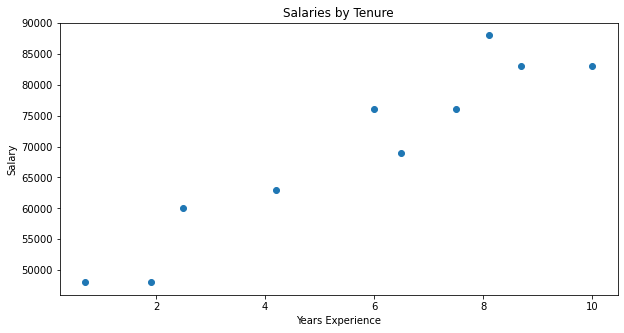

In [50]:
make_chart_salaries_by_tenure()

In [60]:
salary_by_tenure = defaultdict(list)

# salário por anos de experiência
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# média salarial para cada ano
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [61]:
def tenure_bucket(tenure):
    '''agrupando os casos'''
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

# junta os salários correspondentes para cada agrupamento
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# computa a média salarial para cada grupo
average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

## Contas pagas

In [62]:
def predict_paid_or_unpaid(years_experience):
    '''modelo para definir que paga as contas ou não'''
    if years_experience < 3.0: return "paid"
    elif years_experience < 8.5: return "unpaid"
    else: return "paid"